In [1]:
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np 
from scipy import stats
from galpy.util import bovy_coords
import astropy.units as u



%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
# load data 
dt = [('x','f8'),('y','f8'),('z','f8'),('vx','f8'),('vy','f8'),('vz','f8')]
data = np.genfromtxt('/Users/dougl/Desktop/modelR1GaiaChallenge',dtype=dt)

In [31]:
X,Y,Z = [], [], []
U, V, W = [], [], []
for i in range (0,7489269):
    # Append data 
    X.append(data[i][0])
    Y.append(data[i][1])
    Z.append(data[i][2])
    U.append(data[i][3])
    V.append(data[i][4])
    W.append(data[i][5])
    
X,Y,Z = np.array(X), np.array(Y), np.array(Z) 
U,V,W = np.array(U), np.array(V), np.array(W)

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.



Text(0,0.5,'Log($\\Sigma(x,y)$)')

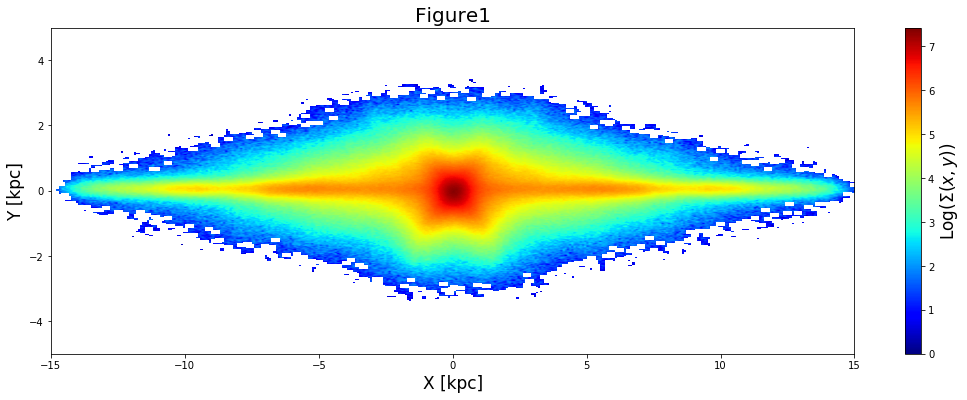

In [32]:
H = np.histogram2d(Z, X, bins=(np.arange(-3,3,step=0.008), np.arange(-15,15,step=0.08)))

fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
T = plt.imshow(np.log(H[0]), aspect='auto', extent=[-15, 15, -5,5], cmap='jet', interpolation='gaussian')
ax.set_xlabel('X [kpc]', size=17)
ax.set_ylabel('Y [kpc]', size=17)
cbar = fig.colorbar(T)
ax.set_title('Figure1', size=20)

cbar.ax.set_ylabel('Log($\Sigma(x,y)$)', fontsize=17)

C:\Users\dougl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.



Text(0,0.5,'Log($\\Sigma(x,y)$)')

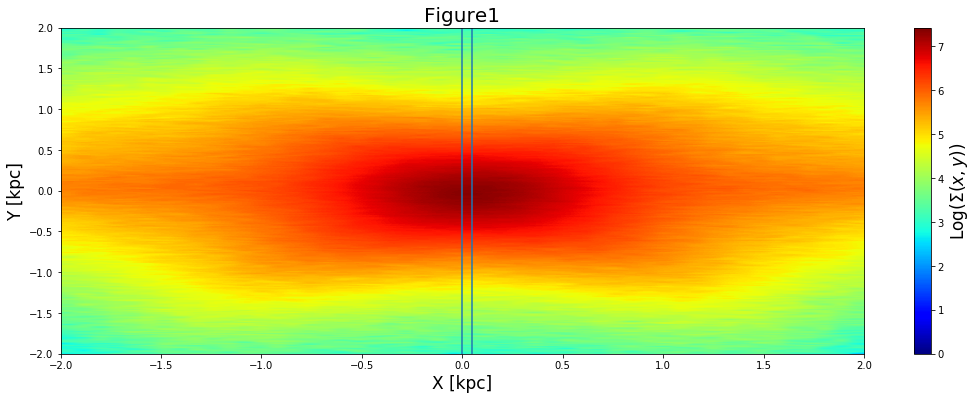

In [33]:
H = np.histogram2d(Z, X, bins=(np.arange(-3,3,step=0.008), np.arange(-15,15,step=0.08)))

fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
T = plt.imshow(np.log(H[0]), aspect='auto', extent=[-15, 15, -5,5], cmap='jet', interpolation='gaussian')
ax.set_xlabel('X [kpc]', size=17)
ax.set_ylabel('Y [kpc]', size=17)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.axvline(0)
ax.axvline(0.05)
cbar = fig.colorbar(T)
ax.set_title('Figure1', size=20)

cbar.ax.set_ylabel('Log($\Sigma(x,y)$)', fontsize=17)

Text(0.5,1,'Figure 3. 2D Histogram of (X,Z) Plane Binned by Median $<V_x>$')

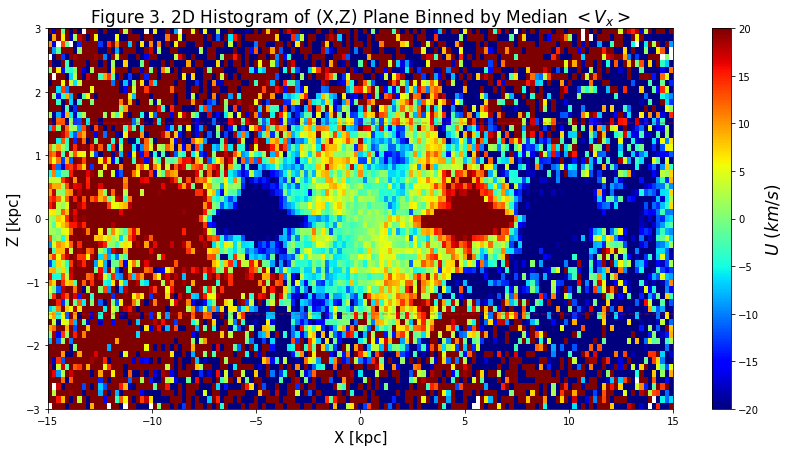

In [35]:
Hv = stats.binned_statistic_2d(Z, X, U, statistic='median',
                              bins=(np.arange(-3,3,step=0.1), np.arange(-15,15,step=0.2)))

fig = plt.figure(figsize=(14,7))
T =plt.imshow((Hv[0]), aspect='auto', cmap='jet', vmin=-20, vmax=20, interpolation='nearest',
            extent=[-15,15, -3,3])
plt.axhline(1.5, color='red', ls='--', alpha=0.3)
plt.axhline(-1.5, color='red', ls='--', alpha=0.3)
plt.xlabel('X [kpc]', size=15)
plt.ylabel('Z [kpc]', size=15)
cbar = fig.colorbar(T)
cbar.ax.set_ylabel('$U\ (km/s)$', fontsize=17)
plt.title('Figure 3. 2D Histogram of (X,Z) Plane Binned by Median $<V_x>$', size=17)